In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-and-potability/water_potability.csv


# # Load dataset


In [108]:
data = pd.read_csv('/kaggle/input/water-quality-and-potability/water_potability.csv')
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

# # To check the dataset information

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [110]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# # To check for null values

In [111]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# # Describe the dataset to see statistical values


In [112]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [113]:
data['ph'].unique()

array([       nan, 3.71608008, 8.09912419, ..., 9.41951032, 5.12676292,
       7.87467136])

In [114]:
data['ph'].value_counts()

ph
3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: count, Length: 2785, dtype: int64

# # Check for duplicates

In [115]:
data.duplicated().sum()

0

# # Boxplot to check if outliers exist

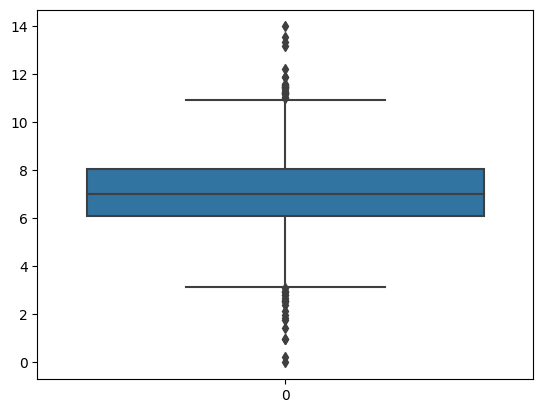

In [116]:
sns.boxplot(data['ph'])
plt.show()

# # Fill the missing values with median as there are outliers****
# # Let's not remove the outliers as the values are important to identify the potability of water

In [117]:
data['ph'].fillna(data['ph'].median(),inplace = True)
data.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [118]:
data['Sulfate'].unique()

array([368.51644135,          nan, 356.88613564, ..., 258.93060041,
       345.70025734, 359.94857437])

<Axes: >

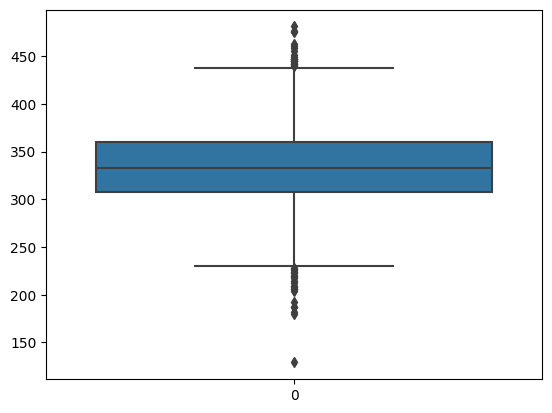

In [119]:
sns.boxplot(data['Sulfate'])

In [120]:
data['Sulfate'].fillna(data['Sulfate'].median(),inplace = True)
data.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

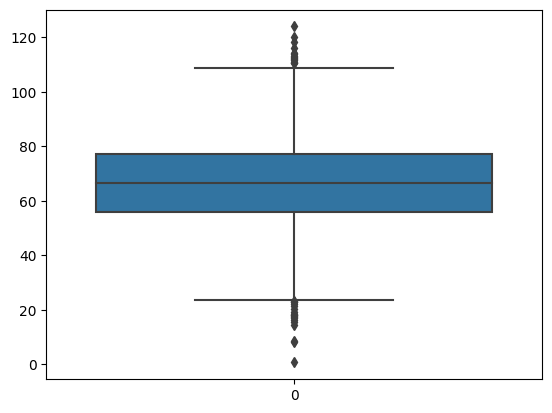

In [121]:
sns.boxplot(data['Trihalomethanes'])

In [122]:
data['Trihalomethanes'].fillna(data['Trihalomethanes'].median(),inplace = True)
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# # Find the correlation between variables

In [123]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075760 -0.082004    -0.031741  0.014178   
Hardness         0.075760  1.000000 -0.046899    -0.030054 -0.092833   
Solids          -0.082004 -0.046899  1.000000    -0.070148 -0.149747   
Chloramines     -0.031741 -0.030054 -0.070148     1.000000  0.023762   
Sulfate          0.014178 -0.092833 -0.149747     0.023762  1.000000   
Conductivity     0.017466 -0.023915  0.013831    -0.020486 -0.014182   
Organic_carbon   0.040240  0.003610  0.010242    -0.012653  0.027102   
Trihalomethanes  0.003145 -0.012707 -0.008799     0.016614 -0.025657   
Turbidity       -0.036107 -0.014449  0.019546     0.002363 -0.009767   
Potability      -0.003014 -0.013837  0.033743     0.023779 -0.020476   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017466        0.040240         0.003145  -0.036107   
Hardness            -0.023915        0.003610        -0.012707  -0.014449   
Solids               0.013831        0.010242        -0.008799   0.019546   
Chloramines         -0.020486       -0.012653         0.016614   0.002363   
Sulfate             -0.014182        0.027102        -0.025657  -0.009767   
Conductivity         1.000000        0.020966         0.001184   0.005798   
Organic_carbon       0.020966        1.000000        -0.012958  -0.027308   
Trihalomethanes      0.001184       -0.012958         1.000000  -0.021487   
Turbidity            0.005798       -0.027308        -0.021487   1.000000   
Potability          -0.008128       -0.030001         0.006887   0.001581   

                 Potability  
ph                -0.003014  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020476  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006887  
Turbidity          0.001581  
Potability         1.000000

# # Visual representation of correlation matrix

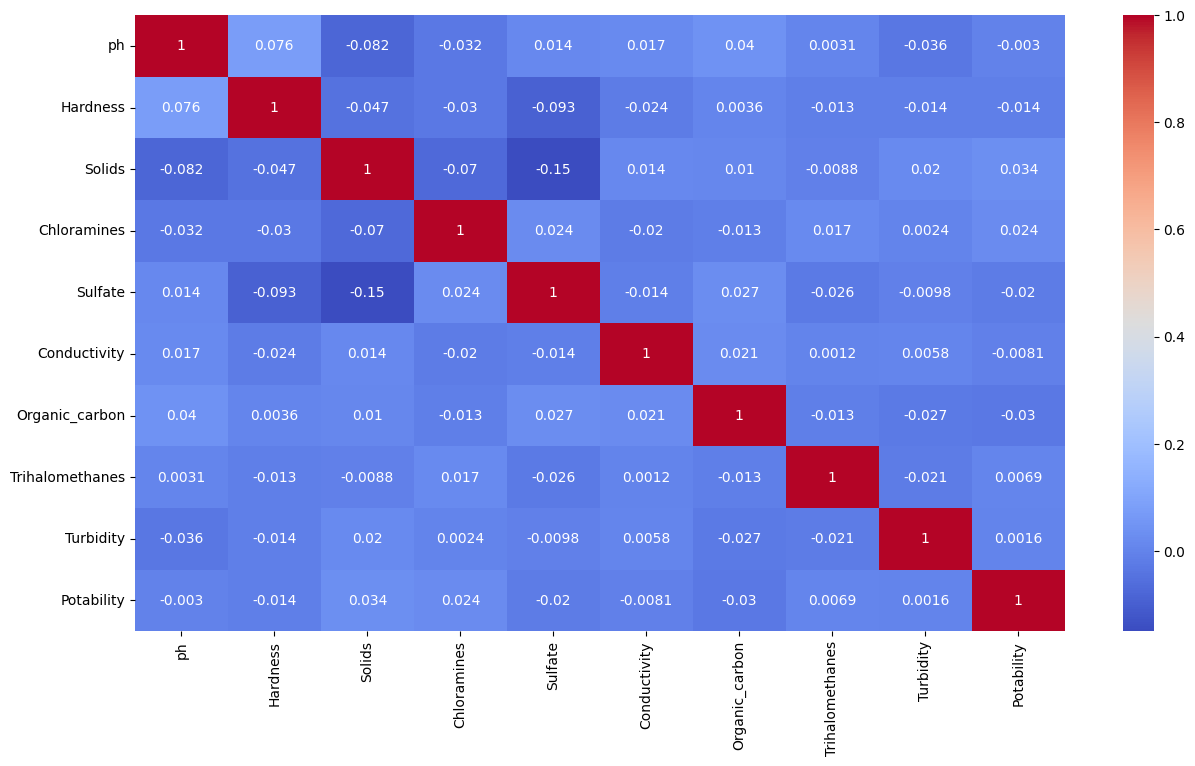

In [124]:
plt.figure(figsize =(15,8))
sns.heatmap(data.corr(),annot =True,cmap = 'coolwarm')
plt.show()

# # Pair plot to visualise relationship between numerical values

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


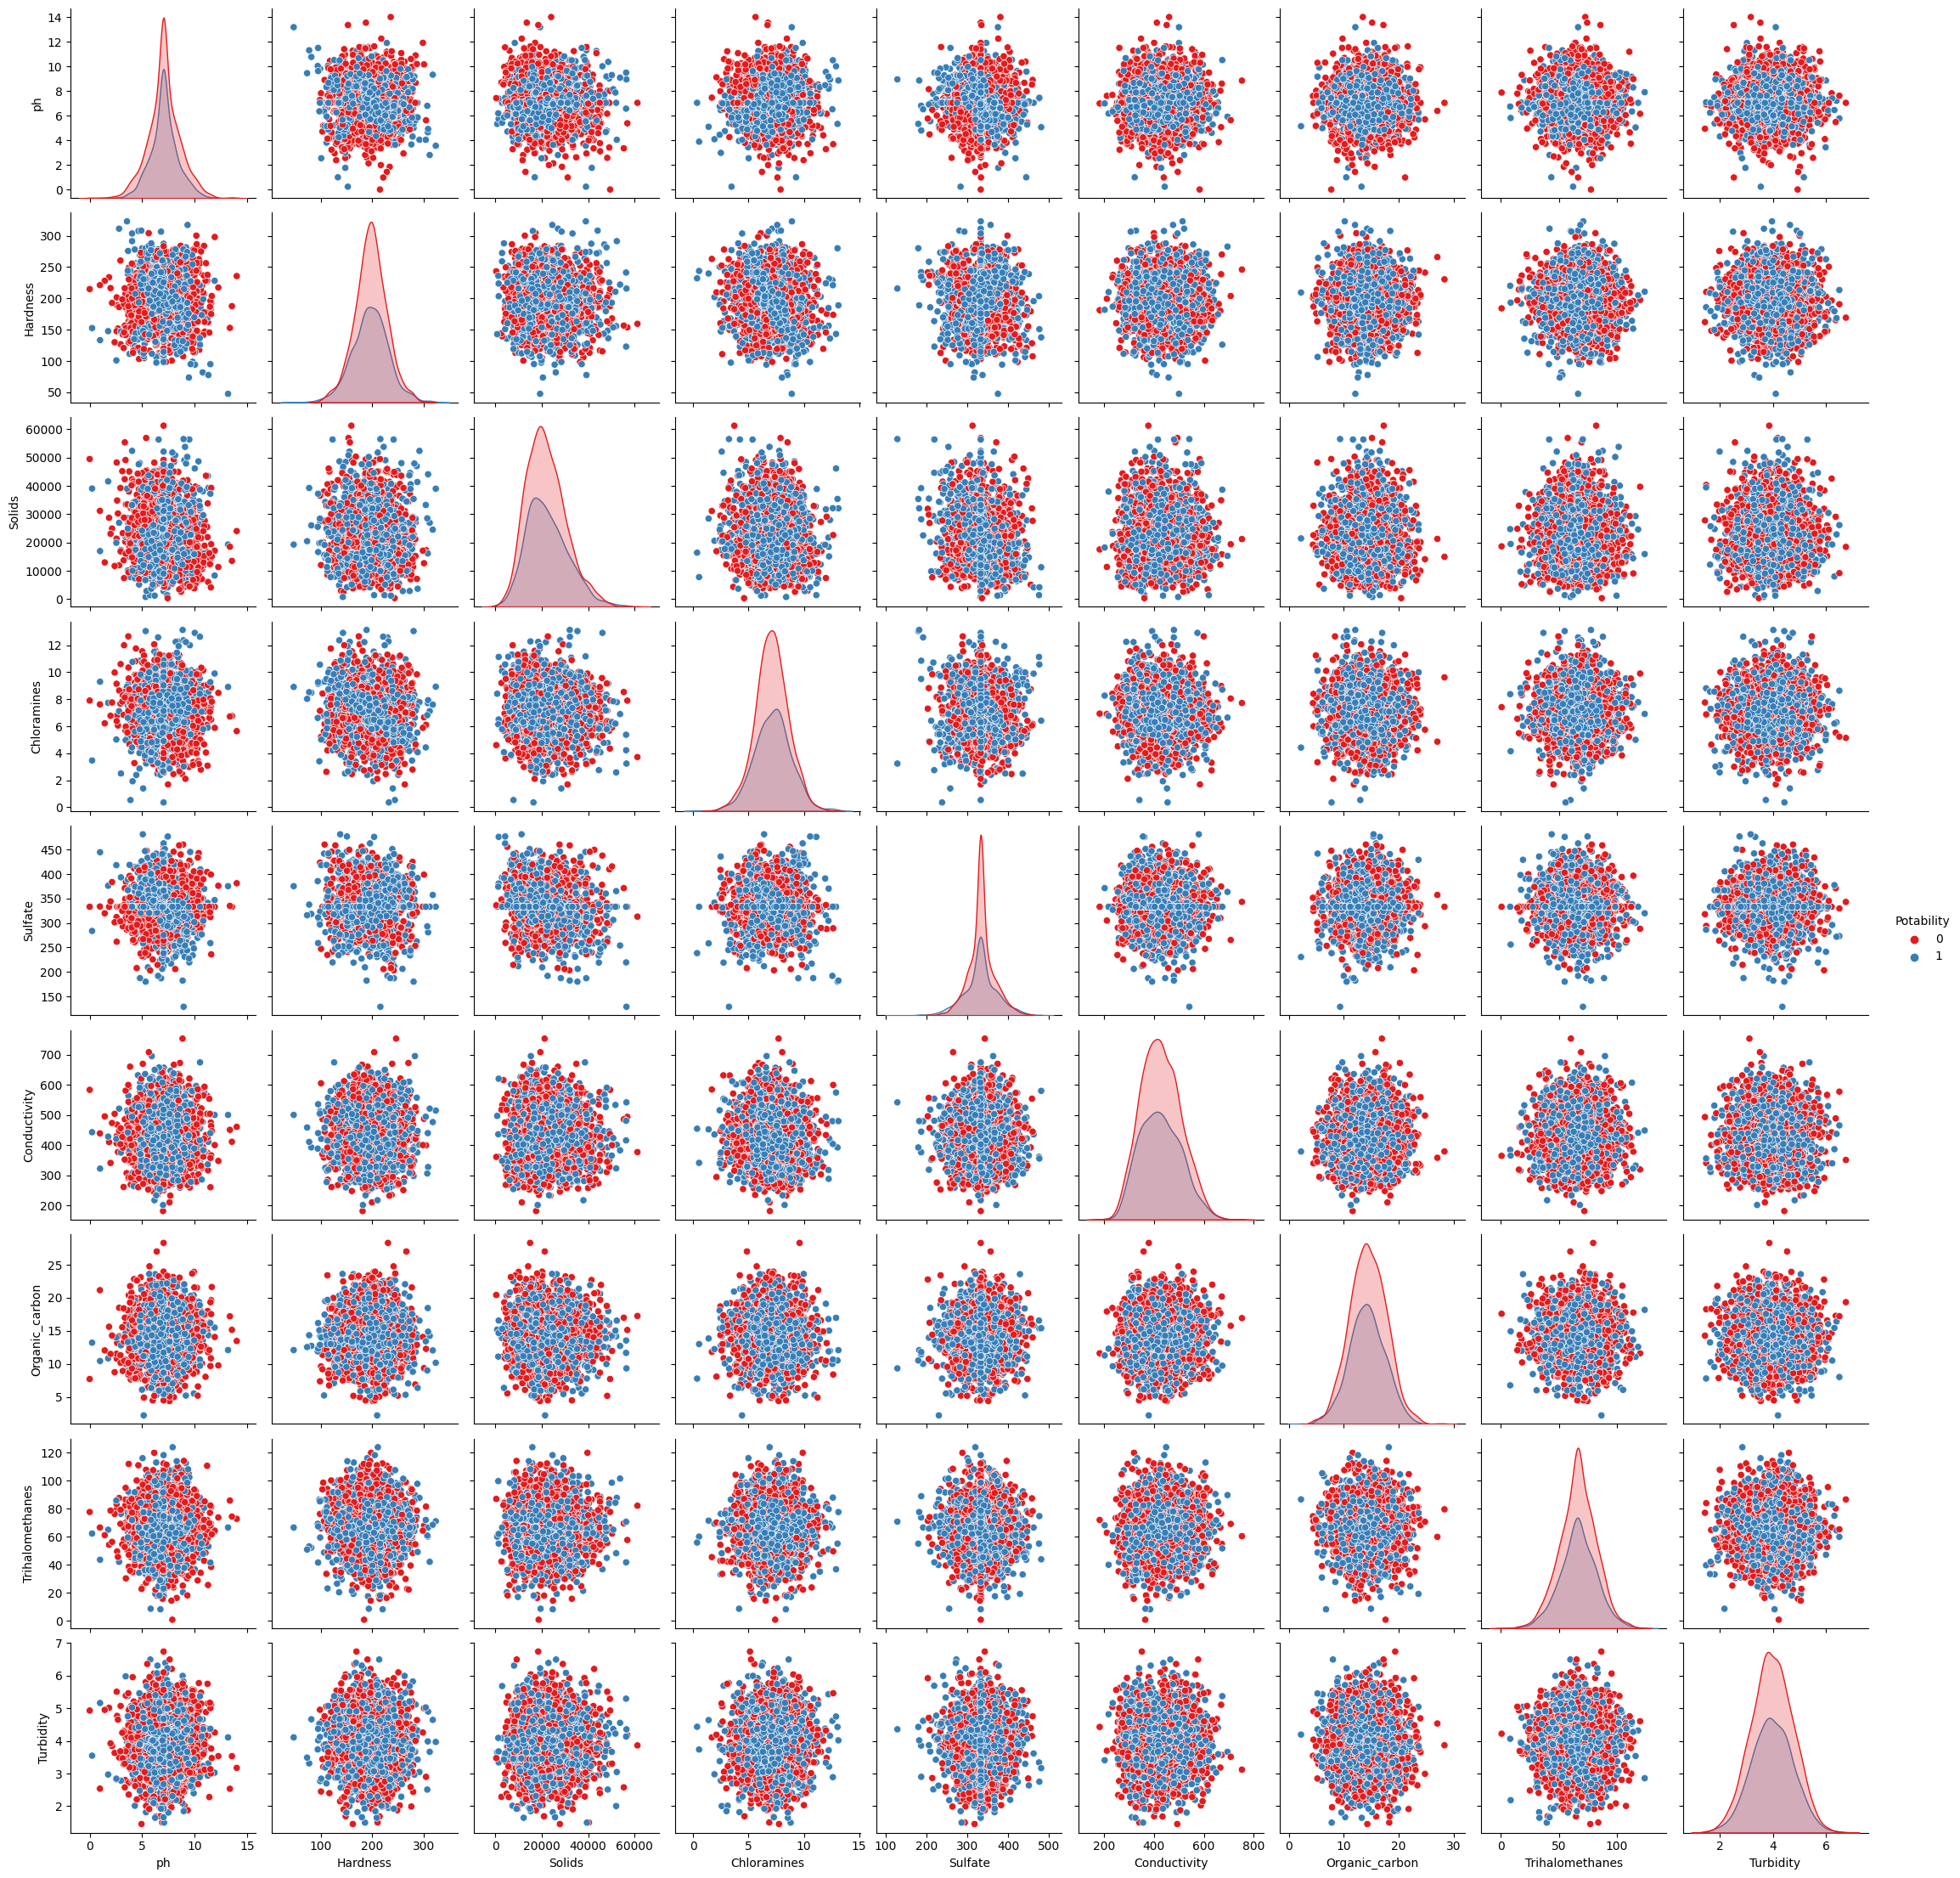

In [125]:
sns.pairplot(data,hue = 'Potability',palette = 'Set1')

# # Hist plot

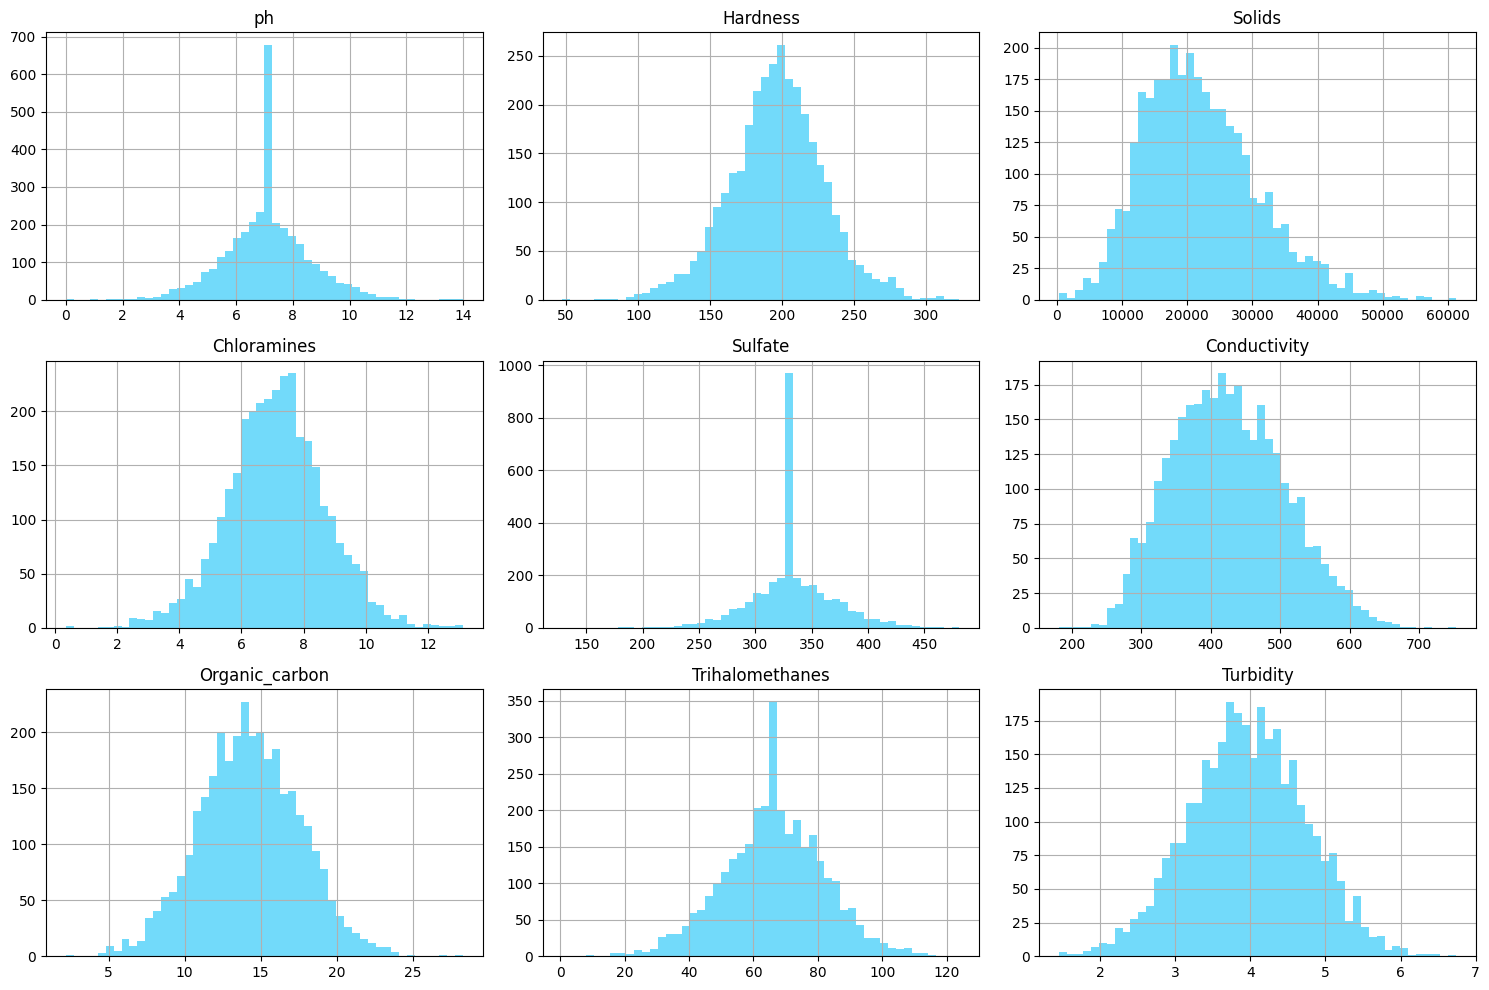

In [126]:
data.drop('Potability',axis = 1).hist(bins = 50,figsize = (15,10),color = '#72DAFA')
plt.tight_layout()
plt.show()

# # split the data into variables(x) and target(y)

In [127]:
x = data.iloc[:,:-1]
x

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.622485   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [128]:
y = data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

# # Standardisation of data

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

# # Split the data into train data and test data

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size = 0.2,random_state = 42)

In [131]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2620, 9)
(656, 9)
(2620,)
(656,)


# # Predictive modelling

# # 1.Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Accuracy score:  0.6280487804878049
-----------------------------------
Confusion Matrix:
 [[412 244]
 [  0   0]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.63       656
   macro avg       0.50      0.31      0.39       656
weighted avg       1.00      0.63      0.77       656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


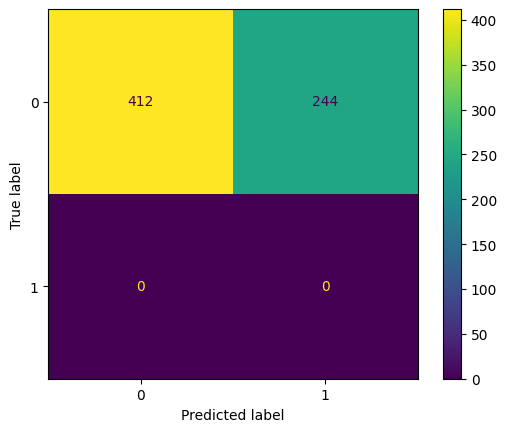

In [165]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(lr_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(lr_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(lr_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(lr_pred, y_test)
plt.show()

# # 2. Decision Tree Classifier

In [166]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc_pred = dc.predict(x_test)
dc_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

Accuracy score:  0.5884146341463414
-----------------------------------
Confusion Matrix:
 [[270 128]
 [142 116]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       398
           1       0.48      0.45      0.46       258

    accuracy                           0.59       656
   macro avg       0.57      0.56      0.56       656
weighted avg       0.58      0.59      0.59       656



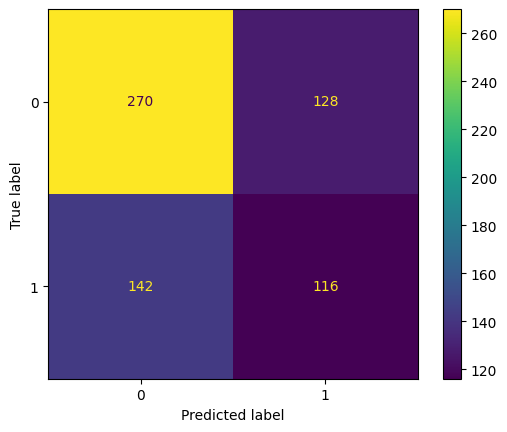

In [167]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(dc_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(dc_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(dc_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(dc_pred, y_test)
plt.show()

# #3. Random Forest Classifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 250)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

Accuracy score:  0.6890243902439024
-----------------------------------
Confusion Matrix:
 [[368 160]
 [ 44  84]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       528
           1       0.34      0.66      0.45       128

    accuracy                           0.69       656
   macro avg       0.62      0.68      0.62       656
weighted avg       0.79      0.69      0.72       656



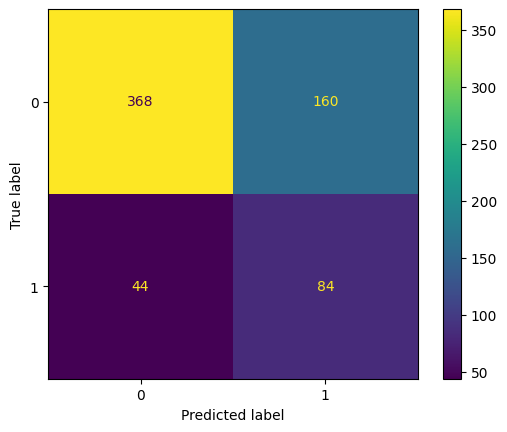

In [177]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(rf_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(rf_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(rf_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(rf_pred, y_test)
plt.show()

# # 4. SGD classifier

In [178]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
sgd_pred = sgd.predict(x_test)
sgd_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Accuracy score:  0.6402439024390244
-----------------------------------
Confusion Matrix:
 [[380 204]
 [ 32  40]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76       584
           1       0.16      0.56      0.25        72

    accuracy                           0.64       656
   macro avg       0.54      0.60      0.51       656
weighted avg       0.84      0.64      0.71       656



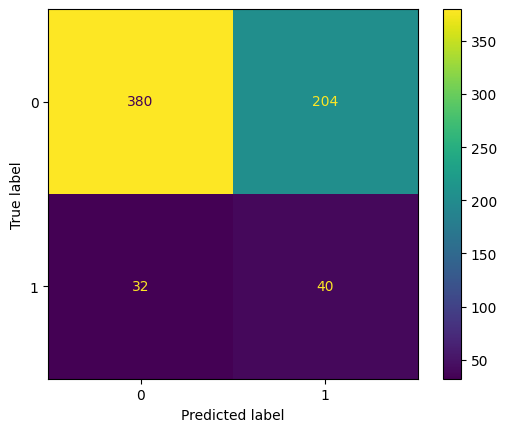

In [179]:
print('Accuracy score: ', accuracy_score(sgd_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(sgd_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(sgd_pred,y_test))
ConfusionMatrixDisplay.from_predictions(sgd_pred, y_test)
plt.show()

# #5. K-Neighbors Classifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 6)
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_test)
print(kn_pred)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 

Accuracy score:  0.6448170731707317
-----------------------------------
Confusion Matrix:
 [[364 185]
 [ 48  59]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.76       549
           1       0.24      0.55      0.34       107

    accuracy                           0.64       656
   macro avg       0.56      0.61      0.55       656
weighted avg       0.78      0.64      0.69       656



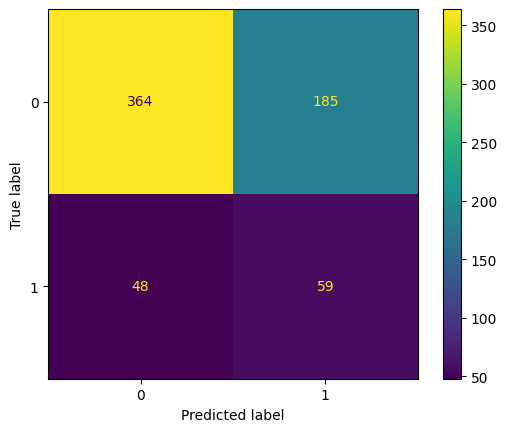

In [186]:
print('Accuracy score: ', accuracy_score(kn_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(kn_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(kn_pred,y_test))
ConfusionMatrixDisplay.from_predictions(kn_pred, y_test)
plt.show()

# #6. Support Vector Machine

In [187]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

Accuracy score:  0.6966463414634146
-----------------------------------
Confusion Matrix:
 [[389 176]
 [ 23  68]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80       565
           1       0.28      0.75      0.41        91

    accuracy                           0.70       656
   macro avg       0.61      0.72      0.60       656
weighted avg       0.85      0.70      0.74       656



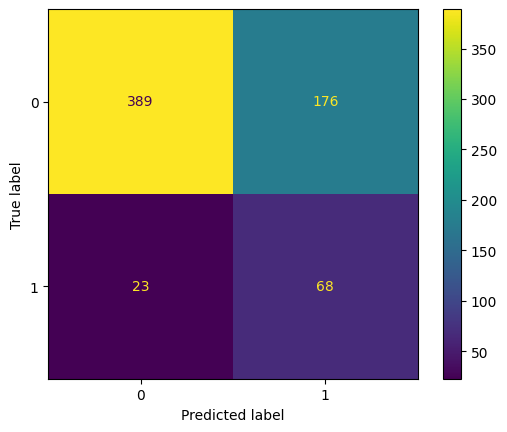

In [188]:
print('Accuracy score: ', accuracy_score(svc_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(svc_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(svc_pred,y_test))
ConfusionMatrixDisplay.from_predictions(svc_pred, y_test)
plt.show()

In [189]:
from sklearn.svm import SVC
svc1 = SVC(kernel = 'poly')
svc1.fit(x_train,y_train)
svc1_pred = svc1.predict(x_test)
svc1_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

Accuracy score:  0.6829268292682927
-----------------------------------
Confusion Matrix:
 [[377 173]
 [ 35  71]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.78       550
           1       0.29      0.67      0.41       106

    accuracy                           0.68       656
   macro avg       0.60      0.68      0.59       656
weighted avg       0.81      0.68      0.72       656



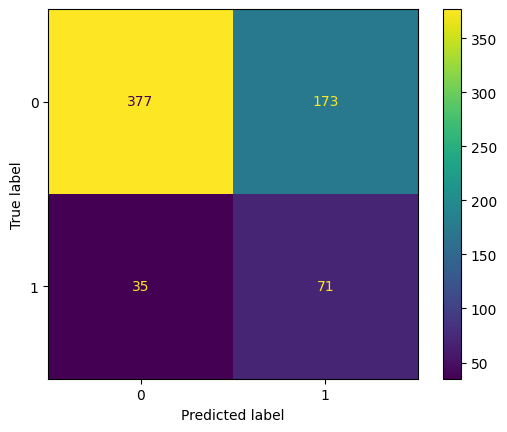

In [190]:
print('Accuracy score: ', accuracy_score(svc1_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(svc1_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(svc1_pred,y_test))
ConfusionMatrixDisplay.from_predictions(svc1_pred, y_test)
plt.show()

In [191]:
from sklearn.svm import SVC
svc2 = SVC(kernel = 'sigmoid')
svc2.fit(x_train,y_train)
svc2_pred = svc2.predict(x_test)
svc2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Accuracy score:  0.6280487804878049
-----------------------------------
Confusion Matrix:
 [[412 244]
 [  0   0]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.63       656
   macro avg       0.50      0.31      0.39       656
weighted avg       1.00      0.63      0.77       656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


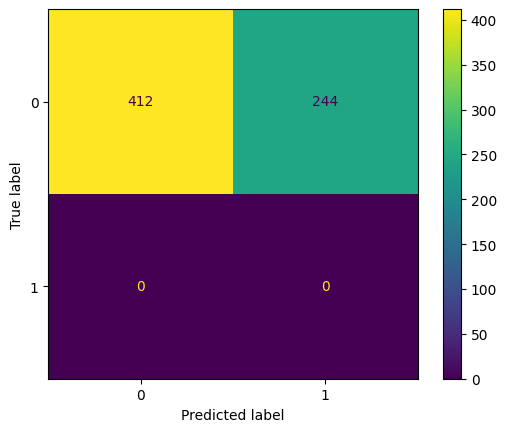

In [192]:
print('Accuracy score: ', accuracy_score(svc2_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(svc2_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(svc2_pred,y_test))
ConfusionMatrixDisplay.from_predictions(svc2_pred, y_test)
plt.show()

In [193]:
from sklearn.svm import SVC
svc3 = SVC(kernel = 'linear' )
svc3.fit(x_train,y_train)
svc3_pred = svc3.predict(x_test)
svc3_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Accuracy score:  0.6280487804878049
-----------------------------------
Confusion Matrix:
 [[412 244]
 [  0   0]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.63       656
   macro avg       0.50      0.31      0.39       656
weighted avg       1.00      0.63      0.77       656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


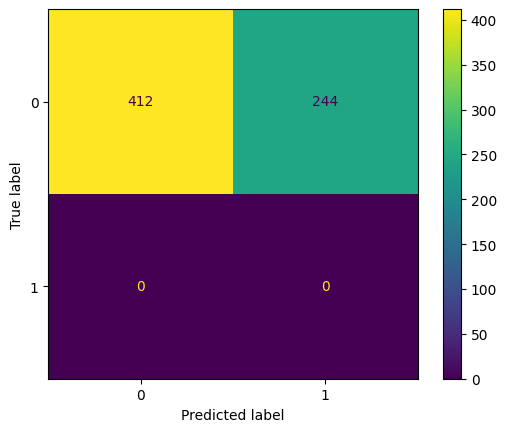

In [194]:
print('Accuracy score: ', accuracy_score(svc3_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(svc3_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(svc3_pred,y_test))
ConfusionMatrixDisplay.from_predictions(svc3_pred, y_test)
plt.show()

# #7. Naive Bayes Classifier

In [195]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb = GaussianNB()
bnb = BernoulliNB()
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)
print('gnb_pred\n',gnb_pred)
bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)
print('bnb_pred\n',bnb_pred)

gnb_pred
 [0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 

Accuracy score:  0.6310975609756098
-----------------------------------
Confusion Matrix:
 [[361 191]
 [ 51  53]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       552
           1       0.22      0.51      0.30       104

    accuracy                           0.63       656
   macro avg       0.55      0.58      0.53       656
weighted avg       0.77      0.63      0.68       656



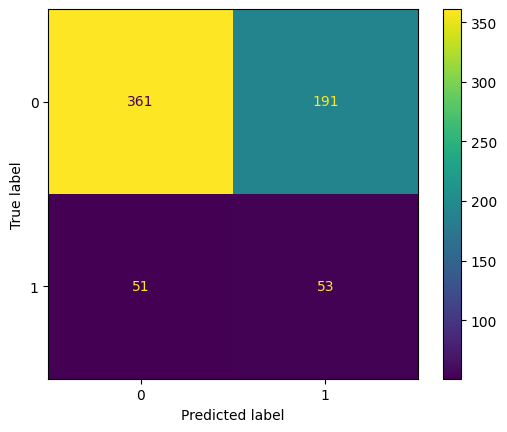

Accuracy score:  0.6280487804878049
-----------------------------------
Confusion Matrix:
 [[412 244]
 [  0   0]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.63       656
   macro avg       0.50      0.31      0.39       656
weighted avg       1.00      0.63      0.77       656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


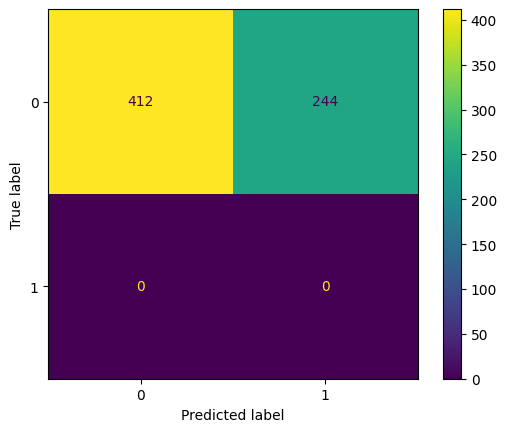

In [196]:
print('Accuracy score: ', accuracy_score(gnb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(gnb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(gnb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(gnb_pred, y_test)
plt.show()
print('Accuracy score: ', accuracy_score(bnb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(bnb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(bnb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(bnb_pred, y_test)
plt.show()

In [197]:
from sklearn.preprocessing import MinMaxScaler
minmax_x = MinMaxScaler()
minmax_x = minmax_x.fit_transform(x)
print(minmax_x)

[[0.50262515 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.33866167 0.56065454 0.34956996]
 [0.36619735 0.66440723 0.19148981 ... 0.34363779 0.62265916 0.61611996]
 [0.56247653 0.53563505 0.28048408 ... 0.5341137  0.63247754 0.16244074]]


In [198]:
x_train,x_test,y_train,y_test = train_test_split(minmax_x,y,test_size = 0.2,random_state = 42)

In [199]:
from sklearn.naive_bayes import MultinomialNB

In [200]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)
mnb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Accuracy score:  0.6280487804878049
-----------------------------------
Confusion Matrix:
 [[412 244]
 [  0   0]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.63       656
   macro avg       0.50      0.31      0.39       656
weighted avg       1.00      0.63      0.77       656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


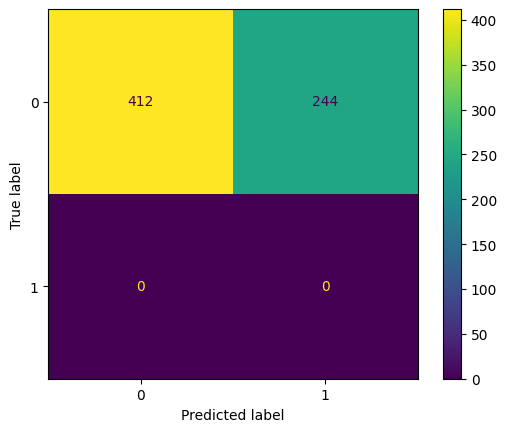

In [201]:
print('Accuracy score: ', accuracy_score(mnb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(mnb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(mnb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(mnb_pred, y_test)
plt.show()

# #8. Light Gradient Boosting classifier

In [202]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(x_train,y_train)
lgb_pred = lgb.predict(x_test)
lgb_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,

Accuracy score:  0.6600609756097561
-----------------------------------
Confusion Matrix:
 [[338 149]
 [ 74  95]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       487
           1       0.39      0.56      0.46       169

    accuracy                           0.66       656
   macro avg       0.60      0.63      0.61       656
weighted avg       0.71      0.66      0.68       656



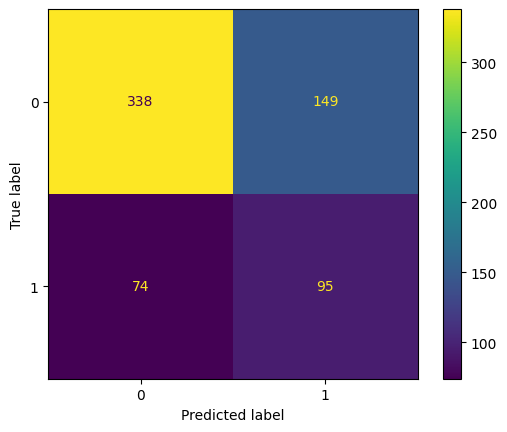

In [203]:
print('Accuracy score: ', accuracy_score(lgb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(lgb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(lgb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(lgb_pred, y_test)
plt.show()

# #9. Extreme Gradient Boosting Classifier

In [204]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

Accuracy score:  0.6753048780487805
-----------------------------------
Confusion Matrix:
 [[335 136]
 [ 77 108]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       471
           1       0.44      0.58      0.50       185

    accuracy                           0.68       656
   macro avg       0.63      0.65      0.63       656
weighted avg       0.71      0.68      0.69       656



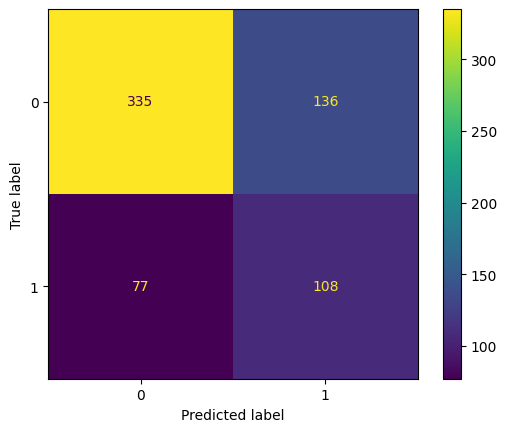

In [205]:
print('Accuracy score: ', accuracy_score(xgb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(xgb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(xgb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(xgb_pred, y_test)
plt.show()

# #10. Gradient Boosting Classifier

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Accuracy score:  0.6554878048780488
-----------------------------------
Confusion Matrix:
 [[363 177]
 [ 49  67]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       540
           1       0.27      0.58      0.37       116

    accuracy                           0.66       656
   macro avg       0.58      0.62      0.57       656
weighted avg       0.77      0.66      0.69       656



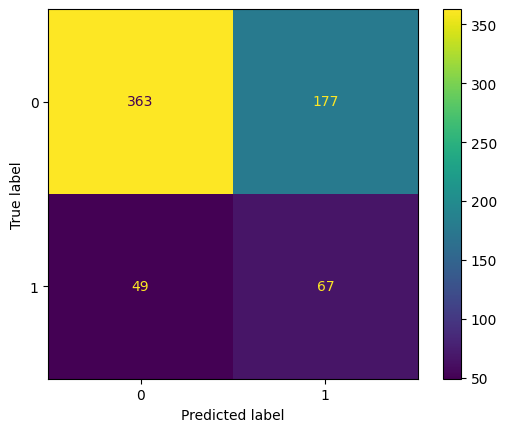

In [207]:
print('Accuracy score: ', accuracy_score(gb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(gb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(gb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(gb_pred, y_test)
plt.show()

In [208]:
print('Accuracy score of Logistic Regression: ','-'*5, accuracy_score(lr_pred,y_test))
print('Accuracy score of Decision Tree: ','-'*11, accuracy_score(dc_pred,y_test))
print('Accuracy score of Random Forest: ','-'*11, accuracy_score(rf_pred,y_test))
print('Accuracy score of SGD: ','-'*21, accuracy_score(sgd_pred,y_test))
print('Accuracy score of KNN: ','-'*21, accuracy_score(kn_pred,y_test))
print('Accuracy score of SVM(rbf): ','-'*16, accuracy_score(svc_pred,y_test))
print('Accuracy score of SVM(poly): ','-'*15, accuracy_score(svc1_pred,y_test))
print('Accuracy score of SVM(sigmoid): ','-'*12, accuracy_score(svc2_pred,y_test))
print('Accuracy score of SVM(linear): ','-'*13, accuracy_score(svc3_pred,y_test))
print('Accuracy score of Gaussian NB: ','-'*13, accuracy_score(gnb_pred,y_test))
print('Accuracy score of Bernoulli NB: ','-'*12, accuracy_score(bnb_pred,y_test))
print('Accuracy score of Multinomial NB: ','-'*10, accuracy_score(mnb_pred,y_test))
print('Accuracy score of LGB: ', '-'*21,accuracy_score(lgb_pred,y_test))
print('Accuracy score of XGB: ','-'*21, accuracy_score(xgb_pred,y_test))
print('Accuracy score of GB: ','-'*22, accuracy_score(gb_pred,y_test))








Accuracy score of Logistic Regression:  ----- 0.6280487804878049
Accuracy score of Decision Tree:  ----------- 0.5884146341463414
Accuracy score of Random Forest:  ----------- 0.6890243902439024
Accuracy score of SGD:  --------------------- 0.6402439024390244
Accuracy score of KNN:  --------------------- 0.6448170731707317
Accuracy score of SVM(rbf):  ---------------- 0.6966463414634146
Accuracy score of SVM(poly):  --------------- 0.6829268292682927
Accuracy score of SVM(sigmoid):  ------------ 0.6280487804878049
Accuracy score of SVM(linear):  ------------- 0.6280487804878049
Accuracy score of Gaussian NB:  ------------- 0.6310975609756098
Accuracy score of Bernoulli NB:  ------------ 0.6280487804878049
Accuracy score of Multinomial NB:  ---------- 0.6280487804878049
Accuracy score of LGB:  --------------------- 0.6600609756097561
Accuracy score of XGB:  --------------------- 0.6753048780487805
Accuracy score of GB:  ---------------------- 0.6554878048780488
